<a href="https://colab.research.google.com/github/SakovAnton/MFTI/blob/main/Yolo8_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pyTelegramBotAPI -q

/bin/bash: pip: command not found


In [4]:
!pip install openpyxl

/bin/bash: pip: command not found


In [1]:
#from ultralytics import YOLO, checks, hub
#checks()

Ultralytics YOLOv8.0.130 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/166.8 GB disk)


In [8]:
# import urllib.request # request нужен для загрузки файлов от пользователя
# import cv2

In [ ]:
import os
import telebot
import locale
from ultralytics import YOLO, checks, hub
from PIL import Image
from urllib.request import urlopen
#from google.colab.patches import cv2_imshow
from openpyxl import Workbook
from openpyxl.styles import Font, Color, Alignment
#from google.colab.patches import cv2_imshow
#from google.colab import drive

In [6]:
drive.mount('/content/drive')

NameError: name 'drive' is not defined

In [1]:
# Create a new YOLO model from scratch
#model = YOLO('yolov8m.yaml')

#ROOT_DIR = '/content/drive/MyDrive/YOLO/'
#results = model.train(data=os.path.join(ROOT_DIR, "config_Y3.yaml"), epochs = 400, batch = 1, device = 'cuda', imgsz = 2280 )  # train the model



In [ ]:
#####   model = YOLO('/content/drive/MyDrive/YOLO/Y13/detect/train6/weights/best.pt')

In [7]:
model = YOLO('best.pt')

In [8]:
def build_menu(buttons, n_cols,
               header_buttons=None,
               footer_buttons=None):
    menu = [buttons[i:i + n_cols] for i in range(0, len(buttons), n_cols)]
    if header_buttons:
        menu.insert(0, [header_buttons])
    if footer_buttons:
        menu.append([footer_buttons])
    return menu

In [ ]:
!pip install telegram

In [9]:
message_instruction = ' Я бот, который умеет на основе нейросети искать на плане электромонтажа условные обозначения розеток и формировать коммерческое предложние на их монтаж.'
message_instruction_2 = ' Если вы мне пришлёте лист с проектом на которм отображён план размещения розеток,то я с удовольствием расчитаю стоимость работ по их монтажу.'
message_instruction_3 = ' Большая просьба прислать мне скрин с вашего дизайн проекта в хорошем качестве, фото сделанное телефоном я тоже понимаю, но пока значительно хуже (я только учусь). '

In [10]:
def answer (ans):
  answer = f'Я насчитал на вашем плане {ans} розеток. Я отметил на вашем плане найденные моной розетки.'
  return answer

In [11]:
def generate_offer (path, count):
    workbook = Workbook()
    sheet = workbook.active
    sheet.title = "Смета"
    #sheet.freeze_panes = row_to_freeze
    headers = ["поз", "вид работ", "расценка" ,"кол-во", "ед.изм.", "итого"]
    font = Font(name='Calibri',
                 size=12,
                 bold=True,
                 italic=False,
                 vertAlign=None,
                 underline='none',
                 strike=False,
                 color='000000FF')

    alignment=Alignment(horizontal='general',
                     vertical='bottom',
                     text_rotation=0,
                     wrap_text=False,
                     shrink_to_fit=False,
                     indent=0)

    sheet["A1"] = headers[0]
    sheet["A1"].font = font
    sheet["B1"] = headers[1]
    sheet["B1"].font = font
    sheet["C1"] = headers[2]
    sheet["C1"].font = font
    sheet["D1"] = headers[3]
    sheet["D1"].font = font
    sheet["E1"] = headers[4]
    sheet["E1"].font = font
    sheet["F1"] = headers[5]
    sheet["F1"].font = font

    sheet.column_dimensions['B'].width = 45
    sheet.column_dimensions['C'].width = 15

    data = [dict(zip(headers, (1 , "сверление отверстия для подрозетника", 200, count,"шт.", count*200))),
            dict(zip(headers, (2 , "монтаж подрозетника", 100, count,"шт.", count*100))),
            dict(zip(headers, (3 , "монтаж механизма розетки", 150, count,"шт.", count*150)))
            ]

    row = 3
    for d in data:
        sheet[f'A{row}'] = d["поз"]
        sheet[f'B{row}'] = d["вид работ"]
        sheet[f'C{row}'] = d["расценка"]
        sheet[f'D{row}'] = d["кол-во"]
        sheet[f'E{row}'] = d["ед.изм."]
        sheet[f'F{row}'] = d["итого"]

        row += 1

    sheet["E7"] = "ВСЕГО"
    sheet["E7"].font = font
    sheet["F7"] = "=SUM(F3:F5)"
    sheet["F7"].font = font

    workbook.save(path)




In [ ]:

token = '6389699537:AAEZWRjf-FyQTiKbX-1gpKKvBKB0bS-TGa0'
bot=telebot.TeleBot(token)

@bot.message_handler(commands=['start'])
def start_message(message):
    bot.send_message(message.chat.id, 'Привет')

@bot.message_handler(content_types=['text'])
def text_handler(message):
    if message.chat.type == 'private':
        bot.send_message(message.chat.id, message_instruction)
        bot.send_message(message.chat.id, message_instruction_2)
        bot.send_message(message.chat.id, message_instruction_3)

@bot.message_handler(content_types=['document'])

def handle_docs_audio(message):
    document_id = message.document.file_id
    file_info = bot.get_file(document_id)
    file_path = 'pic.jpg'
    urllib.request.urlretrieve(f'http://api.telegram.org/file/bot{token}/{file_info.file_path}', file_path)

    image_path = 'pic.jpg'

    image = Image.open(image_path)

    res = model(image)

    image_path = 'pic.jpg'

    image = Image.open(image_path)

    res = model(image)

    bot.send_message(message.chat.id, answer(len(res[0])))

    res_plotted = res[0].plot()
    file = cv2_imshow(res_plotted)
    image_res_path = 'doc_res.jpg'

    cv2.imwrite('doc_res.jpg', res_plotted)

    file = open(image_res_path, 'rb')
    bot.send_photo(message.chat.id, file)

    smeta_path = 'smeta.xlsx'
    generate_offer (smeta_path, len(res[0]))
    bot.send_document(message.chat.id, open(smeta_path, 'rb'))


@bot.message_handler(content_types=['photo'])
def handle_photos(message):
    # Обработка фото
    file_path = 'foto.jpg'
    photo_id = message.photo[-1].file_id
    file_info = bot.get_file(photo_id)
    urllib.request.urlretrieve(f'http://api.telegram.org/file/bot{token}/{file_info.file_path}', file_path)
    # Дополнительные действия с фото

    image_path = '/content/drive/MyDrive/YOLO/foto.jpg'

    image = Image.open(image_path)

    res = model(image)

    image_path = '/content/drive/MyDrive/YOLO/foto.jpg'

    image = Image.open(image_path)

    res = model(image)


    bot.send_message(message.chat.id, answer(len(res[0])))

    res_plotted = res[0].plot()
    file = cv2_imshow(res_plotted)
    image_res_path = '/content/drive/MyDrive/YOLO/foto_res.jpg'

    cv2.imwrite('/content/drive/MyDrive/YOLO/foto_res.jpg', res_plotted)

    file = open(image_res_path, 'rb')
    bot.send_photo(message.chat.id, file)

    smeta_path = '/content/drive/MyDrive/YOLO/smeta.xlsx'
    generate_offer (smeta_path, len(res[0]))
    bot.send_document(message.chat.id, open(smeta_path, 'rb'))


if __name__ == '__main__':
    print('Bot is staring...')
    bot.infinity_polling() # запускаем бота, чтоб он работал вечно

In [ ]:
#print(locale.getpreferredencoding())

In [ ]:
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
#import locale
#print(locale.getpreferredencoding())

In [ ]:
results = model.val()
success = model.export(format='onnx')

Ultralytics YOLOv8.0.128 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25840339 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/YOLO/data/labels/train.cache... 64 images, 1 backgrounds, 0 corrupt: 100%|██████████| 65/65 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:25<00:00,  2.57it/s]
                   all         65       1947      0.864      0.894      0.926      0.631
Speed: 2.6ms preprocess, 215.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
Ultralytics YOLOv8.0.128 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

PyTorch: starting from runs/detect/train3/weights/best.pt with input shape (1, 3, 2304, 2304) BCHW and output shape(s) (1, 5, 108864) (50.0 MB)
requirements: Ultralytics requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 11.5s, saved as runs/detect/train3/weights/best.onnx (100.7 MB)

Export complete (12.1s)
Results saved to /content/runs/detect/train3/weights
Predict:         yolo predict task=detect model=runs/detect/train3/weights/best.onnx imgsz=2304 
Validate:        yolo val task=detect model=runs/detect/train3/weights/best.onnx imgsz=2304 data=/content/drive/MyDrive/YOLO/config_Y3.yaml 
Visualize:       https://netron.app


In [ ]:
!scp -r /content/runs  /content/drive/MyDrive/YOLO/Y15 #запись


0: 1632x2304 41 sws, 1721.4ms
Speed: 303.9ms preprocess, 1721.4ms inference, 32.1ms postprocess per image at shape (1, 3, 1632, 2304)


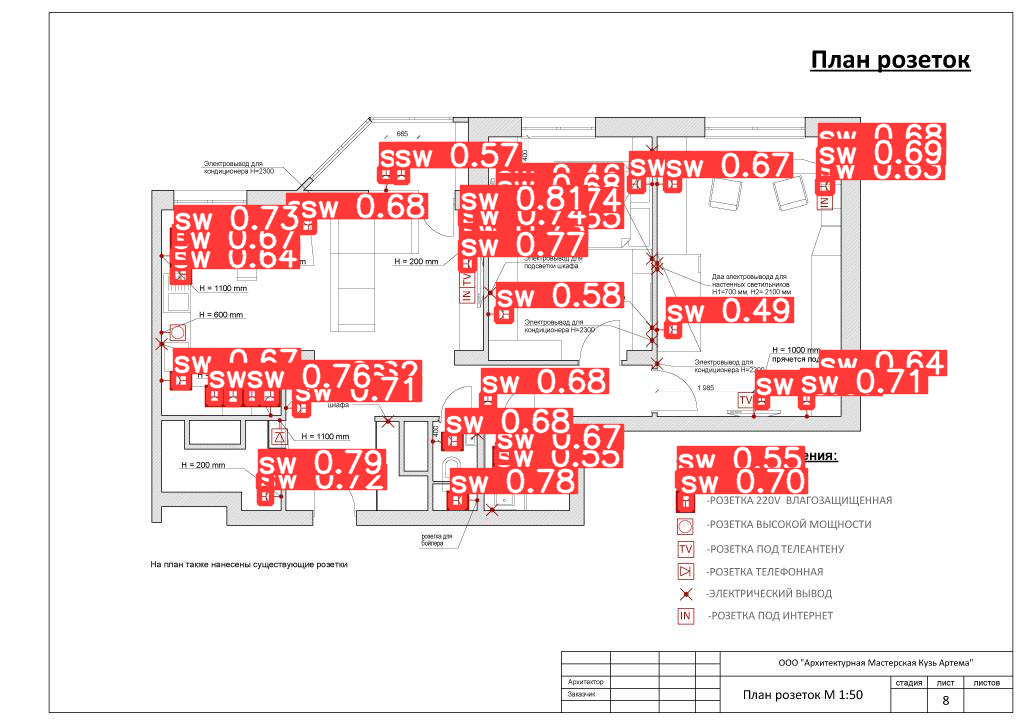

In [ ]:
# Загрузка изображения
image_path = 'https://ledsshop.ru/wp-content/uploads/5/4/5/545d7ae00923554983e451fa0e4900a7.jpeg'

image = Image.open(urlopen(image_path))

res = model(image)
res_plotted = res[0].plot()
cv2_imshow(res_plotted)

In [ ]:
len(res[0])

31


0: 1632x2304 21 sws, 236.7ms
Speed: 48.0ms preprocess, 236.7ms inference, 3.0ms postprocess per image at shape (1, 3, 1632, 2304)


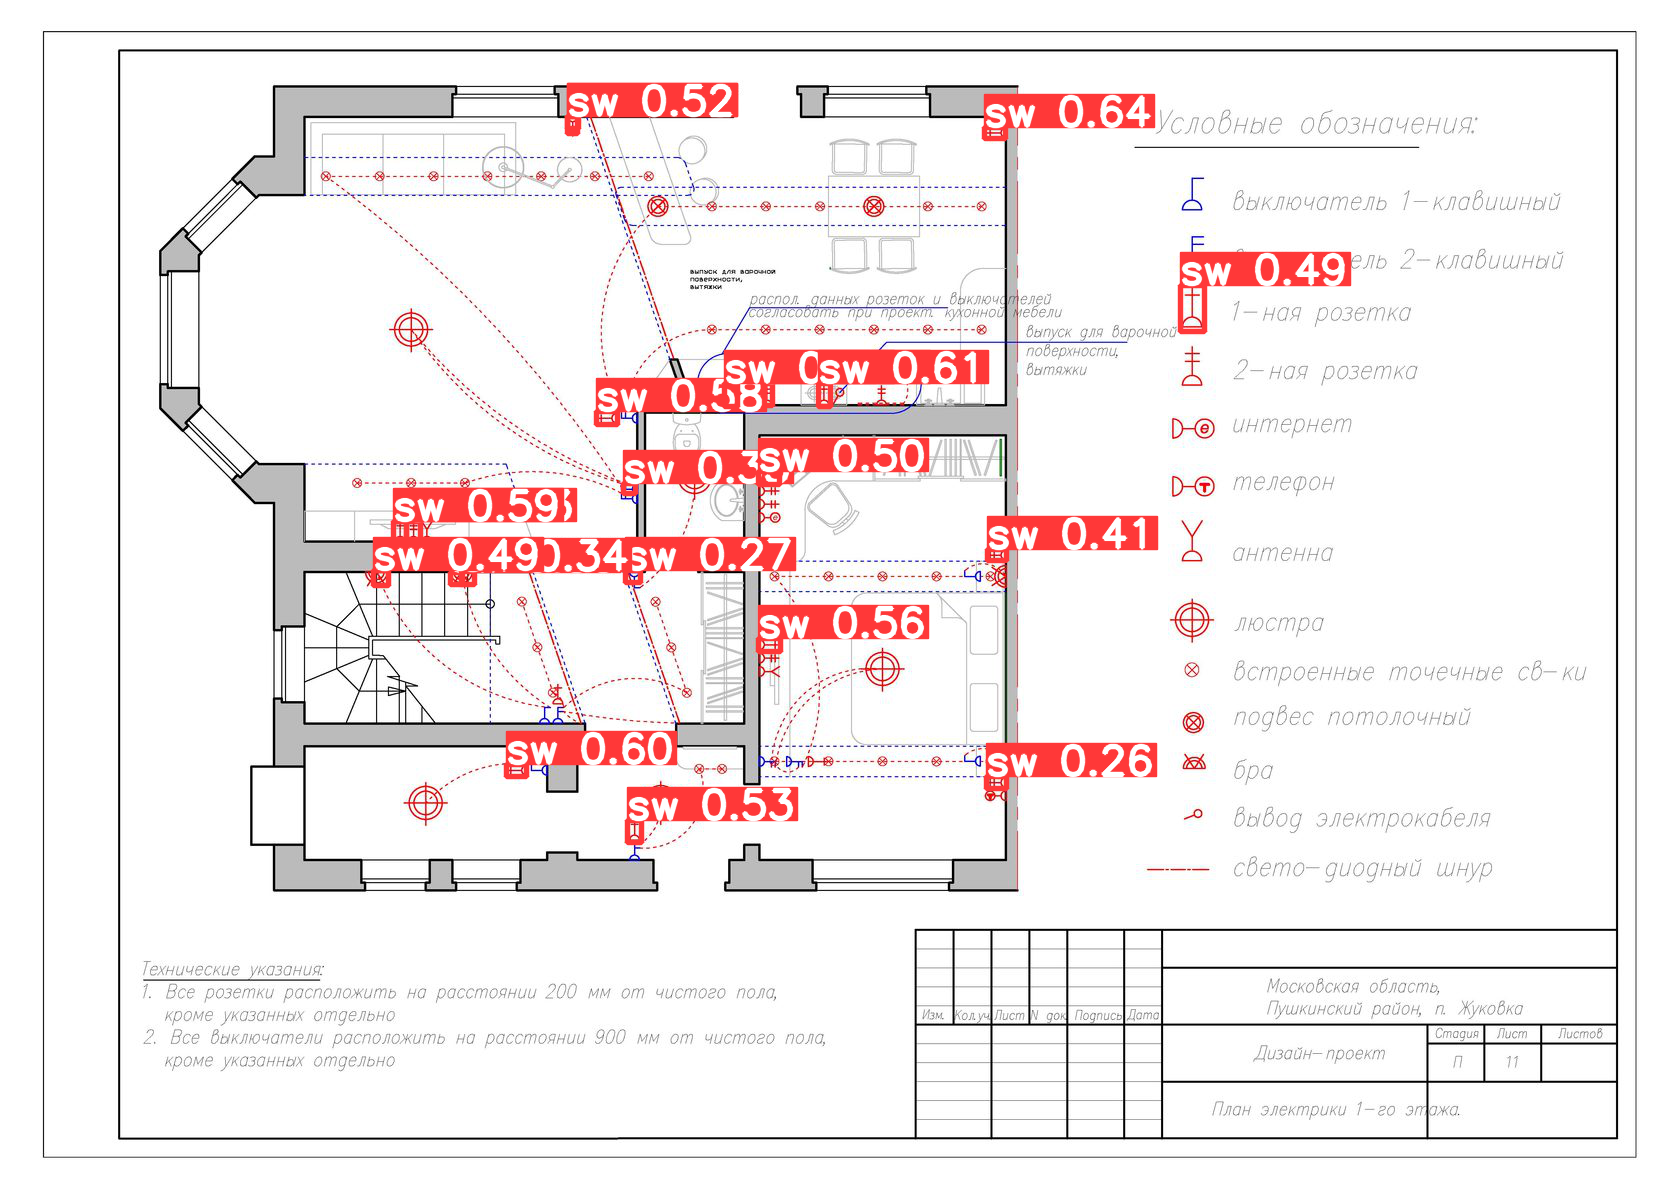

In [ ]:
# Загрузка изображения
image_path = 'https://static.tildacdn.com/tild6662-6135-4632-b363-303738636138/10012.jpg'
image = Image.open(urlopen(image_path))
res = model(image)
res_plotted = res[0].plot()
cv2_imshow(res_plotted)


In [ ]:
len(res[0])

13


0: 1632x2304 30 sws, 248.2ms
Speed: 21.7ms preprocess, 248.2ms inference, 2.3ms postprocess per image at shape (1, 3, 1632, 2304)


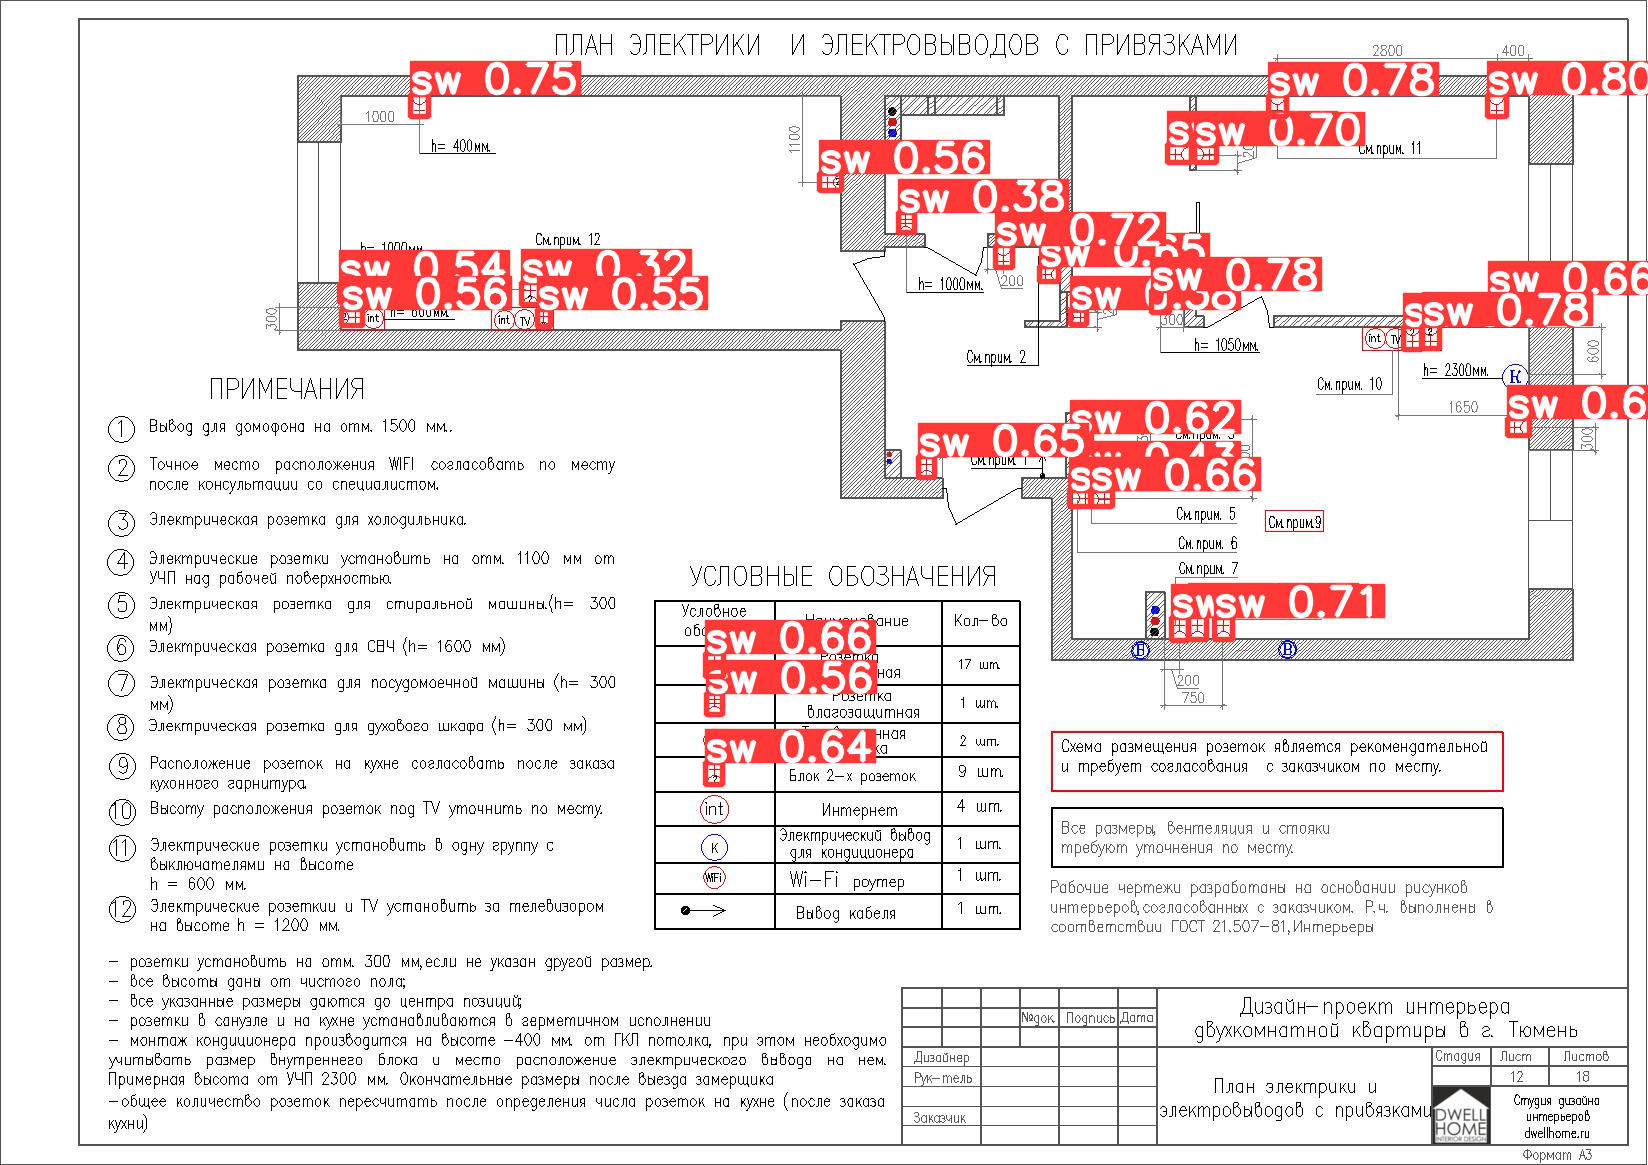

In [ ]:
image_path = ' https://bigfoto.name/uploads/posts/2021-10/1634856937_34-bigfoto-name-p-proektirovanie-rozetok-43.jpg'
image = Image.open(urlopen(image_path))
res = model(image)
res_plotted = res[0].plot()
cv2_imshow(res_plotted)

In [ ]:
len(res[0])

26


0: 1632x2304 24 sws, 260.9ms
Speed: 20.3ms preprocess, 260.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1632, 2304)


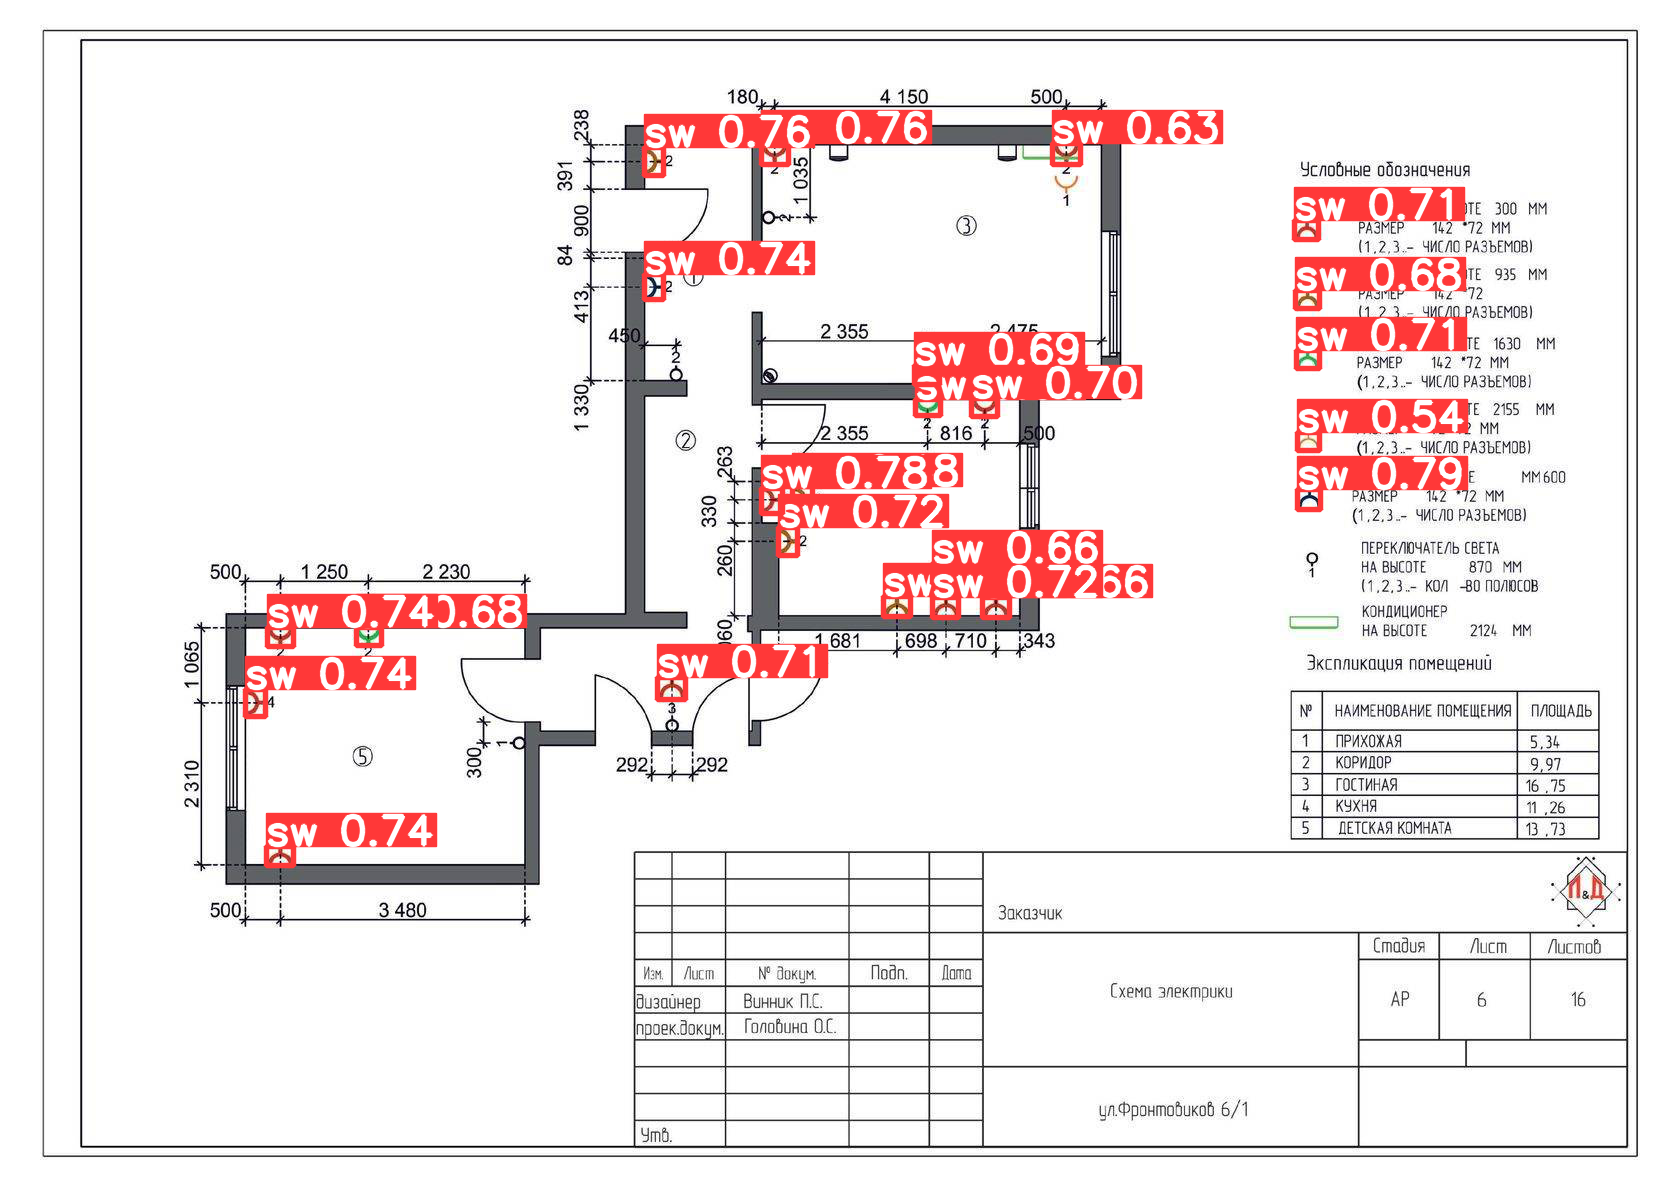

In [ ]:
image_path =  'https://dpkgroup.ru/wp-content/uploads/7/e/b/7ebee171cac052e23d58082906d34567.jpeg '
image = Image.open(urlopen(image_path))
res = model(image)
res_plotted = res[0].plot()
cv2_imshow(res_plotted)

In [ ]:
len(res[0])

27


0: 1696x2304 70 sws, 257.3ms
Speed: 28.0ms preprocess, 257.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1696, 2304)


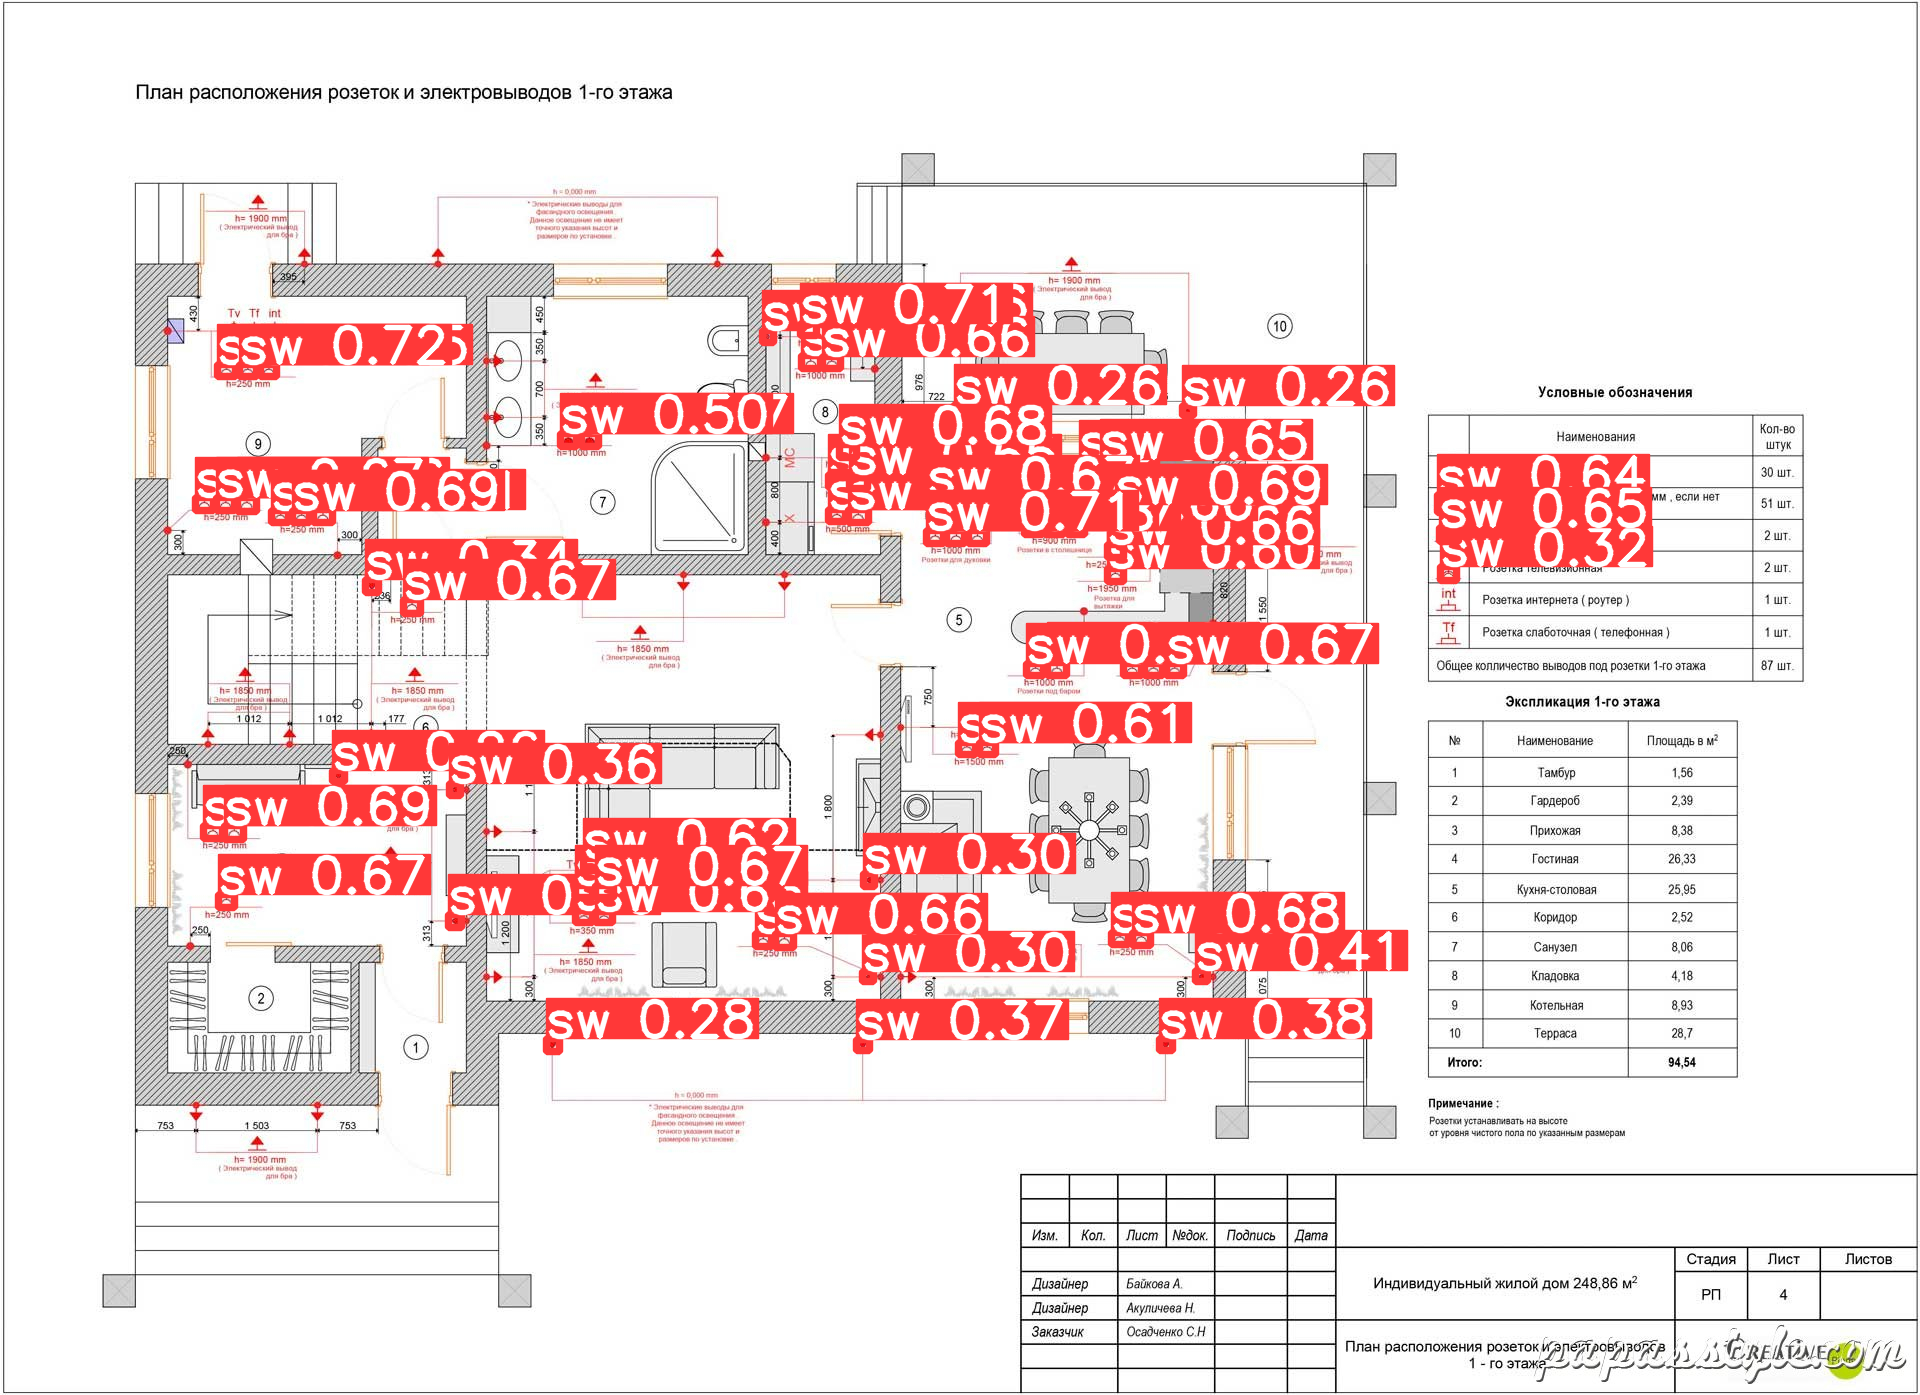

In [ ]:
image_path = ' https://bigfoto.name/uploads/posts/2021-10/1634857001_37-bigfoto-name-p-proektirovanie-rozetok-46.jpg'
image = Image.open(urlopen(image_path))
res = model(image)
res_plotted = res[0].plot()
cv2_imshow(res_plotted)

In [ ]:
len(res[0])

62


0: 1632x2304 44 switch_singles, 11.2ms
Speed: 27.8ms preprocess, 11.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1632, 2304)


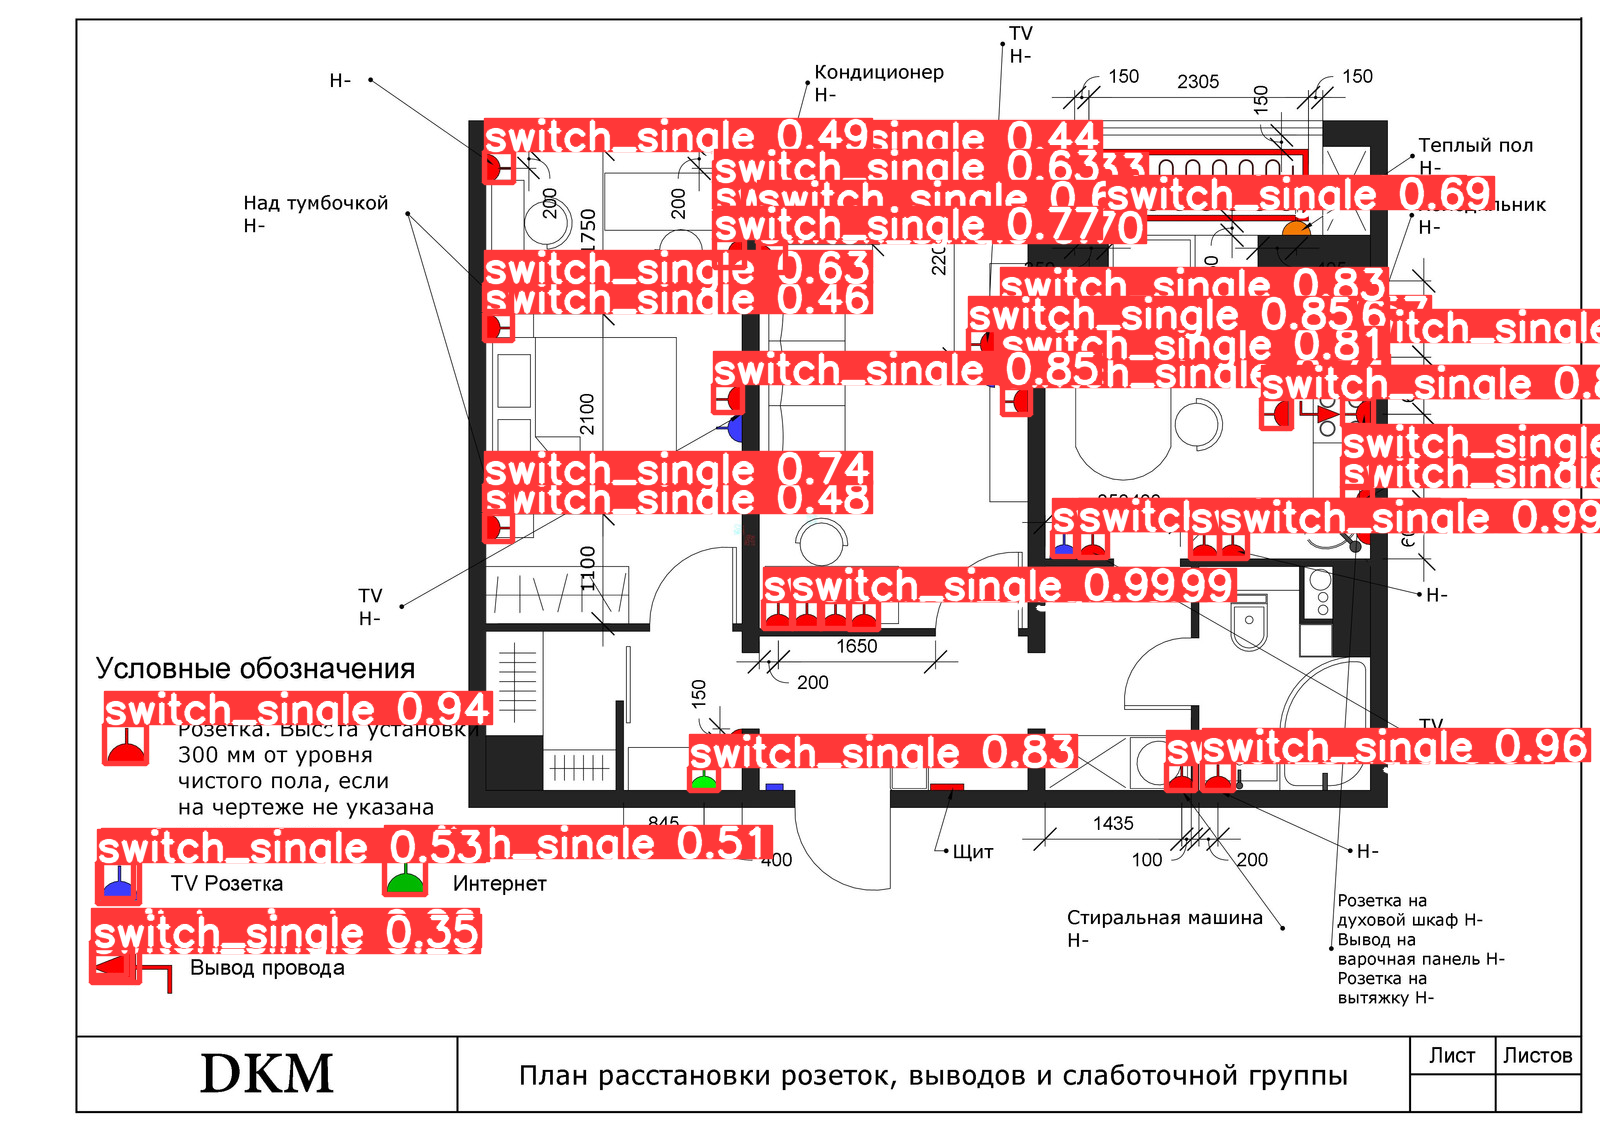

In [ ]:
image_path = ' https://static.wixstatic.com/media/c420be_3a3d6597f36746aebb68142e0c24f566~mv2_d_4133_2923_s_4_2.jpg/v1/fill/w_1600,h_1131,al_c,q_90/file.jpg'
image = Image.open(urlopen(image_path))
res = model(image)
res_plotted = res[0].plot()
cv2_imshow(res_plotted)


0: 1600x2304 1 switch_single, 10.7ms
Speed: 18.9ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 1600, 2304)


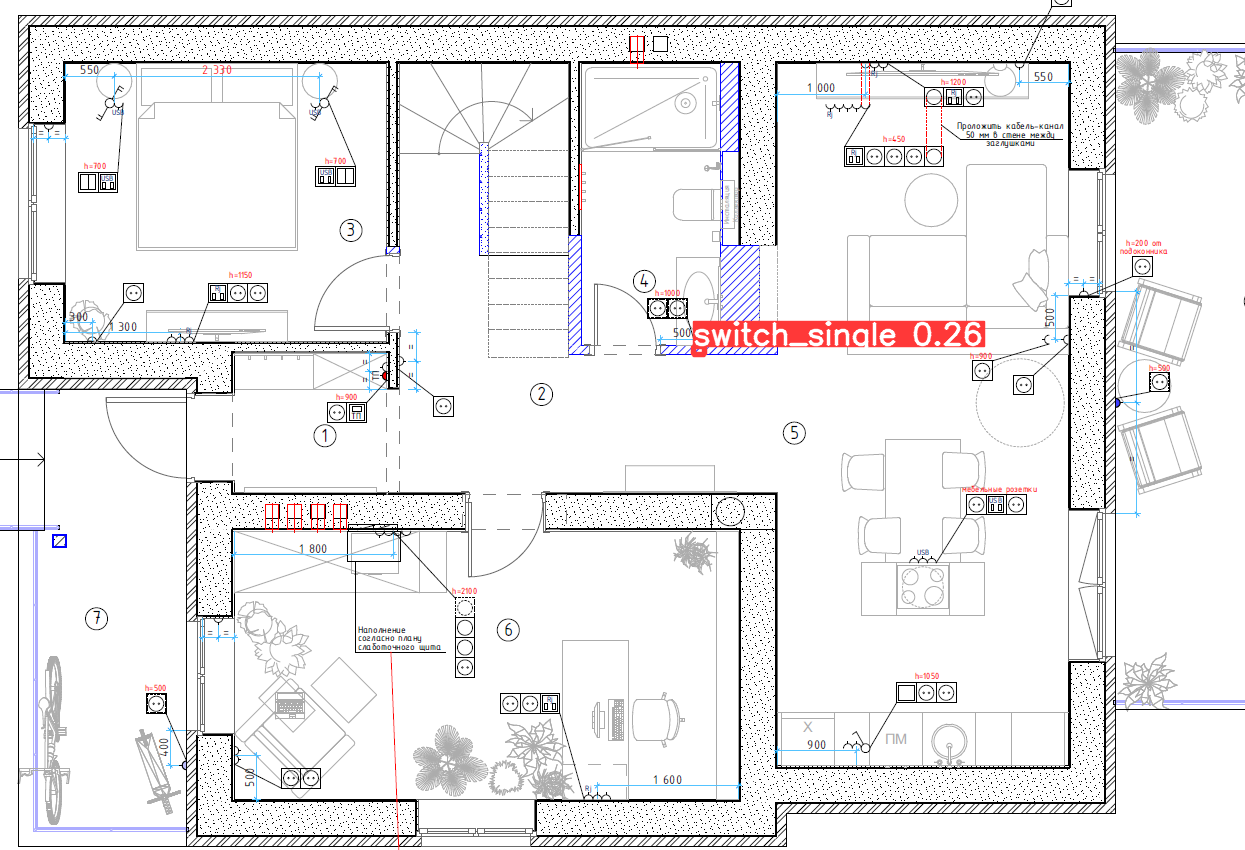

In [ ]:
image_path = '/content/drive/MyDrive/YOLO/Screenshot_1.png'
image = Image.open(image_path)
res = model(image)
res_plotted = res[0].plot()
cv2_imshow(res_plotted)